In [ ]:
%pip install stdatamodels==1.7.1
%pip install --pre astroquery --upgrade

: 

In [1]:
import numpy as np

# Astropy tools:
import astropy.io.fits as fits
from astropy.table import Table

#eJWST astroquery module:
from astroquery.esa.jwst import Jwst
# The JWST models:
from stdatamodels.jwst import datamodels

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Use this version if you want interactive plots
# %matplotlib notebook

# Use this version for non-interactive plots (easier scrolling of the notebook)
%matplotlib inline

# These gymnastics are needed to make the sizes of the figures
# be the same in both the inline and notebook versions
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}

mpl.rcParams['savefig.dpi'] = 80
mpl.rcParams['figure.dpi'] = 80

In [3]:
# Query copied from eJWST Science Archive

query="SELECT * FROM jwst.archive WHERE ( (jwst.archive.instrument_name ILIKE 'MIRI%') ) AND ( (jwst.archive.observing_mode = 'MIR_LRS-FIXEDSLIT') OR (jwst.archive.observing_mode = 'MIR_LRS-SLITLESS') OR (jwst.archive.template = 'MIRI Low Resolution Spectroscopy') ) AND (jwst.archive.public = 'true') AND ( (jwst.archive.calibrationlevel = 3) ) AND ((position_bounds_spoly IS NOT NULL AND INTERSECTS(CIRCLE('ICRS',217.32672987069,-3.44450124455,0.08333333333333333),position_bounds_spoly)=1) ) ORDER BY jwst.archive.calibrationlevel DESC"
job=Jwst.launch_job(query, async_job=True)

INFO: Query finished. [astroquery.utils.tap.core]


In [4]:
job.get_results()

public,calibrationlevel,collection,dataproducttype,detector,energy_bandpassname,energy_bounds_lower,energy_bounds_upper,energy_bounds_width,instrument_name,intent,members,members_number,observationid,observing_mode,obsid,plane_datarelease,planeid,position_bounds_size,position_bounds_spoly,product_url,proposal_id,proposal_keywords,proposal_pi,subarray,target_category,target_keywords,target_moving,target_name,targetposition_coordinates_cval1,targetposition_coordinates_cval2,template,time_bounds_lower,time_bounds_upper,time_exposure,vis_cube,vis_image,wave_central
bool,int32,object,object,object,object,float64,float64,float64,object,object,object,int32,object,object,object,object,object,float64,object,object,object,object,object,object,object,object,int32,object,float64,float64,object,float64,float64,float64,bool,bool,float64
True,3,JWST,spectrum,MIRIMAGE,P750L,5.0,10.0,5.0,MIRI/SLITLESS,science,caom:JWST/jw02783001001_02101_00001-seg001_mirimage caom:JWST/jw02783001001_04102_00001-seg001_mirimage caom:JWST/jw02783001001_04103_00001-seg001_mirimage caom:JWST/jw02783001001_04103_00001-seg002_mirimage caom:JWST/jw02783001001_04103_00001-seg003_mirimage caom:JWST/jw02783001001_04103_00001-seg004_mirimage caom:JWST/jw02783001001_04103_00001-seg005_mirimage caom:JWST/jw02783001001_04103_00001-seg006_mirimage caom:JWST/jw02783001001_04103_00001-seg007_mirimage caom:JWST/jw02783001001_04103_00001-seg008_mirimage caom:JWST/jw02783001001_04103_00001-seg009_mirimage caom:JWST/jw02783002001_02101_00001-seg001_mirimage caom:JWST/jw02783002001_03102_00001-seg001_mirimage caom:JWST/jw02783002001_03103_00001-seg001_mirimage,14,jw02783-c1000_t001_miri_p750l-slitlessprism,MIR_LRS-SLITLESS,bcc0e935-d27f-40ff-b58b-d55205320f25,2023-02-15T02:59:17.0,446b5b16-d8a3-43c9-a4f0-577ea764d74c,0.013023827406507722,Polygon 217.3270848200001 -3.4538388900000023 217.32491420999992 -3.4536694400000028 217.32589378000029 -3.4408694400000015 217.3280476600001 -3.441041670000001,https://jwst.esac.esa.int/server/data?planeid=446b5b16-d8a3-43c9-a4f0-577ea764d74c&PRODUCT_TYPE=science&RETRIEVAL_TYPE=PRODUCT&DATA_RETRIEVAL_ORIGIN=UI,2783,,"Powell, Diana",,,,0,WASP-39,217.3266479166666,-3.444500000000005,MIRI Low Resolution Spectroscopy,59989.62731842454,59989.95805903935,28575.989,False,False,7.500000000000001
True,3,JWST,spectrum,MIRIMAGE,P750L,5.0,10.0,5.0,MIRI/SLITLESS,science,caom:JWST/jw02783001001_02101_00001-seg001_mirimage caom:JWST/jw02783001001_04102_00001-seg001_mirimage caom:JWST/jw02783001001_04103_00001-seg001_mirimage caom:JWST/jw02783001001_04103_00001-seg002_mirimage caom:JWST/jw02783001001_04103_00001-seg003_mirimage caom:JWST/jw02783001001_04103_00001-seg004_mirimage caom:JWST/jw02783001001_04103_00001-seg005_mirimage caom:JWST/jw02783001001_04103_00001-seg006_mirimage caom:JWST/jw02783001001_04103_00001-seg007_mirimage caom:JWST/jw02783001001_04103_00001-seg008_mirimage caom:JWST/jw02783001001_04103_00001-seg009_mirimage,11,jw02783-o001_t001_miri_p750l-slitlessprism,MIR_LRS-SLITLESS,bb3e3a58-fb58-4f3f-b808-26874f7bda8f,2023-02-15T02:59:17.0,3c7d3281-03f9-49e8-bd1c-6c04aca99cf3,0.013023817448305965,Polygon 217.3270700699998 -3.4538385500000004 217.32489946000018 -3.4536691000000004 217.32587902999998 -3.4408691099999973 217.32803290999982 -3.4410413299999982,https://jwst.esac.esa.int/server/data?planeid=3c7d3281-03f9-49e8-bd1c-6c04aca99cf3&PRODUCT_TYPE=science&RETRIEVAL_TYPE=PRODUCT&DATA_RETRIEVAL_ORIGIN=UI,2783,,"Powell, Diana",,,,0,WASP-39,217.3266331634263,-3.444499662017809,MIRI Low Resolution Spectroscopy,59989.62731842454,59989.95805903935,28575.989,False,False,7.500000000000001
True,3,JWST,spectrum,MIRIMAGE,P750L,5.0,10.0,5.0,MIRI/SLITLESS,science,caom:JWST/jw02783002001_02101_00001-seg001_mirimage caom:JWST/jw02783002001_03102_00001-seg001_mirimage caom:JWST/jw02783002001_03103_00001-seg001_mirimage,3,jw02783-o002_t001_miri_p750l-slitlessprism,MIR_LRS-SLITLESS,e37b1a8e-9d92-4ad2-830b-7767f2108a93,2023-02-15T01:59:41.0,068680d8-69e5-41bc-a1b1-

In [5]:
# Retrieve all the files associated to these observations
files = []
for observation in job.get_results()['observationid']:
    products = Jwst.get_product_list(observation_id=observation, cal_level=3, product_type='science')
    files.extend(list(map(lambda v: v, products['filename'])))
files

['jw02783-c1000_t001_miri_p750l-slitlessprism_whtlt.ecsv',
 'jw02783-c1000_t001_miri_p750l-slitlessprism_x1dints.fits',
 'jw02783-o001_t001_miri_p750l-slitlessprism_whtlt.ecsv',
 'jw02783-o001_t001_miri_p750l-slitlessprism_x1dints.fits',
 'jw02783-o002_t001_miri_p750l-slitlessprism_whtlt.ecsv',
 'jw02783-o002_t001_miri_p750l-slitlessprism_x1dints.fits']

This part is only with io.fits HDUList

Filename: /Users/epuga/ESDC/TSViz/data/jwst/jw02783/level_3/jw02783-o002_t001_miri_p750l-slitlessprism_x1dints.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     332   ()      
  1  INT_TIMES     1 BinTableHDU     24   10R x 7C   [J, D, D, D, D, D, D]   
  2  EXTRACT1D     1 BinTableHDU     75   388R x 18C   [D, D, D, D, D, D, D, D, D, D, D, J, D, D, D, D, D, D]   
  3  EXTRACT1D     2 BinTableHDU     75   388R x 18C   [D, D, D, D, D, D, D, D, D, D, D, J, D, D, D, D, D, D]   
  4  EXTRACT1D     3 BinTableHDU     75   388R x 18C   [D, D, D, D, D, D, D, D, D, D, D, J, D, D, D, D, D, D]   
  5  EXTRACT1D     4 BinTableHDU     75   388R x 18C   [D, D, D, D, D, D, D, D, D, D, D, J, D, D, D, D, D, D]   
  6  EXTRACT1D     5 BinTableHDU     75   388R x 18C   [D, D, D, D, D, D, D, D, D, D, D, J, D, D, D, D, D, D]   
  7  EXTRACT1D     6 BinTableHDU     75   388R x 18C   [D, D, D, D, D, D, D, D, D, D, D, J, D, D, D, D, D, D]   
  8  EXTRACT1D 

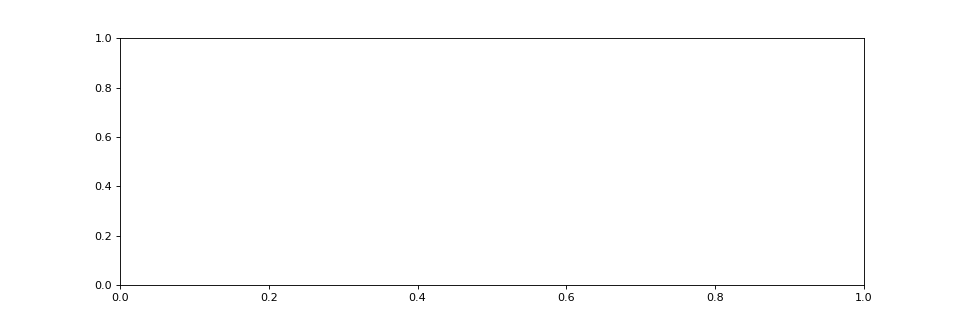

In [6]:
products['filename'][1]

x1dfig2, x1dax2 = plt.subplots(figsize=[12, 4])

x1d_file = '/Users/epuga/ESDC/TSViz/data/jwst/jw02783/level_3/'+ products['filename'][1]

hdu = fits.open(x1d_file)
hdu.info()
#x1d = hdu[3].data
print(hdu[0].header['DATAMODL'])

I try to check the asdf extension

In [7]:
from stdatamodels import asdf_in_fits
af = asdf_in_fits.open(x1d_file)
# access the contents of `af` as a normal `asdf.AsdfFile`
af.tree

/Users/epuga/opt/anaconda3/envs/tsview/lib/python3.10/site-packages/asdf/yamlutil.py:304: AsdfConversionWarning: tag:stsci.edu:gwcs/frame-1.0.0 is not recognized, converting to raw Python data structure
  warnings.warn(
/Users/epuga/opt/anaconda3/envs/tsview/lib/python3.10/site-packages/asdf/yamlutil.py:304: AsdfConversionWarning: tag:stsci.edu:gwcs/step-1.0.0 is not recognized, converting to raw Python data structure
  warnings.warn(
/Users/epuga/opt/anaconda3/envs/tsview/lib/python3.10/site-packages/asdf/yamlutil.py:304: AsdfConversionWarning: tag:stsci.edu:gwcs/celestial_frame-1.0.0 is not recognized, converting to raw Python data structure
  warnings.warn(
/Users/epuga/opt/anaconda3/envs/tsview/lib/python3.10/site-packages/asdf/yamlutil.py:304: AsdfConversionWarning: tag:stsci.edu:gwcs/spectral_frame-1.0.0 is not recognized, converting to raw Python data structure
  warnings.warn(
/Users/epuga/opt/anaconda3/envs/tsview/lib/python3.10/site-packages/asdf/yamlutil.py:304: AsdfConversi

{'asdf_library': {'author': 'The ASDF Developers',
  'homepage': 'http://github.com/asdf-format/asdf',
  'name': 'asdf',
  'version': '2.15.0'},
 'history': {'extensions': [{'extension_class': 'asdf.extension.BuiltinExtension',
    'software': {'name': 'asdf', 'version': '2.15.0'}},
   {'extension_class': 'asdf.extension._manifest.ManifestExtension',
    'extension_uri': 'asdf://asdf-format.org/astronomy/coordinates/extensions/coordinates-1.0.0',
    'software': {'name': 'asdf-astropy', 'version': '0.4.0'}},
   {'extension_class': 'asdf.extension._manifest.ManifestExtension',
    'extension_uri': 'asdf://asdf-format.org/astronomy/gwcs/extensions/gwcs-1.0.0',
    'software': {'name': 'gwcs', 'version': '0.18.3'}},
   {'extension_class': 'asdf_astropy._manifest.CompoundManifestExtension',
    'extension_uri': 'asdf://asdf-format.org/core/extensions/core-1.5.0',
    'software': {'name': 'asdf-astropy', 'version': '0.4.0'}},
   {'extension_class': 'asdf.extension._manifest.ManifestExtensio

In [8]:
af.close()

Now we try opening the x1dints.fits with datamodel

In [31]:
from stdatamodels.jwst import datamodels
with datamodels.open(x1d_file) as x1d:
    x1d.info()
    x1d
    print(x1d.find_fits_keyword('NINTS'))
    print(x1d.meta.exposure.nints)
    print(x1d.find_fits_keyword('BUNIT_DATA'))

/Users/epuga/opt/anaconda3/envs/tsview/lib/python3.10/site-packages/asdf/yamlutil.py:304: AsdfConversionWarning: tag:stsci.edu:gwcs/frame-1.0.0 is not recognized, converting to raw Python data structure
  warnings.warn(
/Users/epuga/opt/anaconda3/envs/tsview/lib/python3.10/site-packages/asdf/yamlutil.py:304: AsdfConversionWarning: tag:stsci.edu:gwcs/step-1.0.0 is not recognized, converting to raw Python data structure
  warnings.warn(
/Users/epuga/opt/anaconda3/envs/tsview/lib/python3.10/site-packages/asdf/yamlutil.py:304: AsdfConversionWarning: tag:stsci.edu:gwcs/celestial_frame-1.0.0 is not recognized, converting to raw Python data structure
  warnings.warn(
/Users/epuga/opt/anaconda3/envs/tsview/lib/python3.10/site-packages/asdf/yamlutil.py:304: AsdfConversionWarning: tag:stsci.edu:gwcs/spectral_frame-1.0.0 is not recognized, converting to raw Python data structure
  warnings.warn(
/Users/epuga/opt/anaconda3/envs/tsview/lib/python3.10/site-packages/asdf/yamlutil.py:304: AsdfConversi

root (AsdfObject)
├─asdf_library (Software)
│ ├─author (str): The ASDF Developers
│ ├─homepage (str): http://github.com/asdf-format/asdf
│ ├─name (str): asdf
│ └─version (str): 2.15.0
├─history (dict)
│ └─extensions (list) ...
├─_fits_hash (str): 44e402faf9621f13a6c0a1aa3df0210ef7ce02b9204c56feaec24bb4b4d51d9f
├─int_times (FITS_rec): shape=(10,), dtype=record416
├─meta (dict)
│ ├─aperture (dict) ...
│ ├─asn (dict) ...
│ ├─cal_step (dict) ...
│ ├─calibration_software_revision (str): RELEASE
│ ├─calibration_software_version (str): 1.10.1
│ ├─compress (bool): False
│ ├─data_processing_software_version (str): 2023_1a
│ ├─date (str): 2023-05-24T18:53:40.269
│ ├─dither (dict) ...
│ ├─exposure (dict) ...
│ └─21 not shown
└─spec (list) ...
Some nodes not shown.
['meta.exposure.nints']
10
[]


In [27]:
x1d.meta._instance
x1d.search(key='TIME_SCALE')

OSError: Cannot access data from closed ASDF file

And we plot the x1dints data product

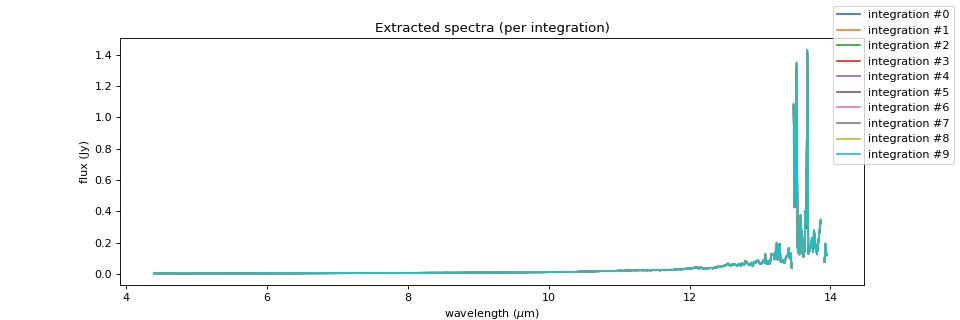

In [10]:

x1dfig2, x1dax2 = plt.subplots(figsize=[12, 4])

#1dax2.plot(x1d.spec[0].spec_table['WAVELENGTH'], x1d.spec[0].spec_table['FLUX'], 'b-', label='from extract1dstep.fits')
for i in range(len(x1d.spec)):
    x1dax2.plot(x1d.spec[i].spec_table['WAVELENGTH'], x1d.spec[i].spec_table['FLUX'], label='integration #{0}'.format(i))
    
x1dax2.set_title('Extracted spectra (per integration)')
x1dax2.set_xlabel('wavelength ($\mu$m)')
x1dax2.set_ylabel('flux (Jy)')

x1dfig2.legend()